#### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like.

<b>Is the website redesign any good?</b>

rephrase to testable hypothesis: 
- Does the redesigned website have a higer click rate than before, which was 5%? 

null hypothesis: 
- The redesigned website has the same click rate as before, which was 5%.

alternative hypothesis:
- The redesigned website does not have a click rate of 5%

true positive: (reject the null hypothesis and the null hypothesis is false)
- the click rate isn't 5% (and it's not)

true negative: (fail to reject the null hypothesis and the null hypothesis is true)
- the click rate is 5% (and it is)

type 1 error: (reject the null hypothesis and the the null hypothesis is true)
- the click rate is not 5% (but it is) 

type 2 error: (accept the null hypothesis and the null hypothesis is false)
- the click rate is 5% (but it's not)

<b>Is our television ad driving more sales?</b>

rephrase to testable hypothesis: 
- Have our sales increased due to the recent television ads? 

null hypothesis: 
- Our sales have not increased due to television ads. 

alternative hypothesis:
- Our sales have increased due to television ads. 

true positive: (reject the null hypothesis and the null hypothesis is false)
- Our sales have increased due to television ads (and they have increased)

true negative: (fail to reject the null hypothesis and the null hypothesis is true)
- Our sales have not increased due to television ads (and they haven't increased)

type 1 error: (reject the null hypothesis and the the null hypothesis is true)
- Our sales have increased due to television ads (but they haven't increased!)

type 2 error: (accept the null hypothesis and the null hypothesis is false)
- Our sales have not increased due to television ads (but they have increased!)

<b>Has the network latency gone up since we switched internet service providers?</b>

rephrase to testable hypothesis: 
- Has the network latency increased with new internet provider?

null hypothesis: 
- The network latency was not improved since we switched providers

alternative hypothesis:
- The network latency has improved since we switched providers

true positive: (reject the null hypothesis and the null hypothesis is false)
- the network latency has improved (and it has)

true negative: (fail to reject the null hypothesis and the null hypothesis is true)
- the network latency has not improved (and it hasn't)

type 1 error: (reject the null hypothesis and the the null hypothesis is true)
- the network latency has improved (and it hasn't)

type 2 error: (accept the null hypothesis and the null hypothesis is false)
- the network latency has not improved (and it has)

#### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [578]:
from math import sqrt
from scipy import stats
import matplotlib.pyplot as plt

office1_n = 40
office1_mean = 90
office1_sd = 15
office2_n = 50
office2_mean = 100
office2_sd = 20

In [32]:
t = (office1_mean - office2_mean) / (office1_sd - math.sqrt(office1_n))
t

-1.1526786659641493

In [33]:
p = stats.t(office1_n - 1).cdf(t) * 2
p

0.25605872029944227

>the p value is greater than alpha, therefore, we fail to reject the null hypothesis

#### Load the mpg dataset and use it to answer the following questions:

In [150]:
from pydataset import data
import pandas as pd

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

> H0: there is no difference in fuel-efficiency cars

In [153]:
mpg["avg_mpg"] = (mpg.cty + mpg.hwy) / 2
mpg.head()

sample1 = mpg [(mpg.year == 1999)].avg_mpg
sample2 = mpg [(mpg.year == 2008)].avg_mpg

stats.ttest_ind(sample1,sample2)

Ttest_indResult(statistic=0.21960177245940962, pvalue=0.8263744040323578)

>the p value is greater than alpha, therefore, we fail to reject the null hypothesis

Are compact cars more fuel-efficient than the average car?
> H0: compact cars use the same amount of fuel as the average car

In [166]:
mpg.head()

sample3 = mpg [mpg["class"] == "compact"].avg_mpg

stats.ttest_1samp(sample3,mpg.avg_mpg.mean())

Ttest_indResult(statistic=6.731177612837954, pvalue=1.3059121585018135e-10)

>the p value is extremely low, therefore, we reject the null hypothesis

Do manual cars get better gas mileage than automatic cars?
> H0: manual cars and automatic cars get the same gas mileage

In [159]:
mpg.head()

sample5 = mpg [mpg["trans"].str.startswith("auto")].avg_mpg
sample6 = mpg [mpg["trans"].str.startswith("man")].avg_mpg

stats.ttest_ind(sample5,sample6)

Ttest_indResult(statistic=-4.593437735750014, pvalue=7.154374401145683e-06)

> the p value is extremely low, therefore, we reject the null hypothesis

#### Use the telco_churn data.

In [823]:
pd.read_sql("select * from customers",env.get_url("telco_churn")).head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [818]:
df = pd.read_excel('Excel_Exercises.xlsx', sheet_name = "mytable_customer_details")
df.head()

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,...,has_internet,has_phone_and_internet,partner_dependents,start_day,avg_mn_charge,contract_typeTYPE,phone_serviceTYPE,internet_serviceTYPE,services,tenure_whole
0,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,...,True,True,3,2019-08-19 22:56:20.488,65.6,1 Year,One Line,DSL,Both,9
1,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,...,True,True,0,2019-08-19 22:40:40.067,59.9,Month-to-Month,Two or More Lines,DSL,Both,9
2,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,...,True,True,0,2019-08-25 04:47:24.926,73.9,Month-to-Month,One Line,Fiber Optic,Both,3
3,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,...,True,True,1,2019-08-16 08:51:11.020,98.0,Month-to-Month,One Line,Fiber Optic,Both,12
4,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,...,True,True,1,2019-08-25 19:30:32.181,83.9,Month-to-Month,One Line,Fiber Optic,Both,3


#### Does tenure correlate with monthly charges? 

In [819]:
stats.pearsonr(df.tenure_whole, df.monthly_charges)

(0.2471713052965402, 1.588121603295395e-98)

> the p-value is close to zero, therefore, we reject the null hypothesis

#### Total charges? 

In [820]:
df_no_null = df [df.total_charges.isnull() == False]

stats.pearsonr(df_no_null.tenure_whole, df_no_null.total_charges)

(0.8261258900540605, 0.0)

> the p-value is zero, therefore, we reject the null hypothesis

#### What happens if you control for phone and internet service?

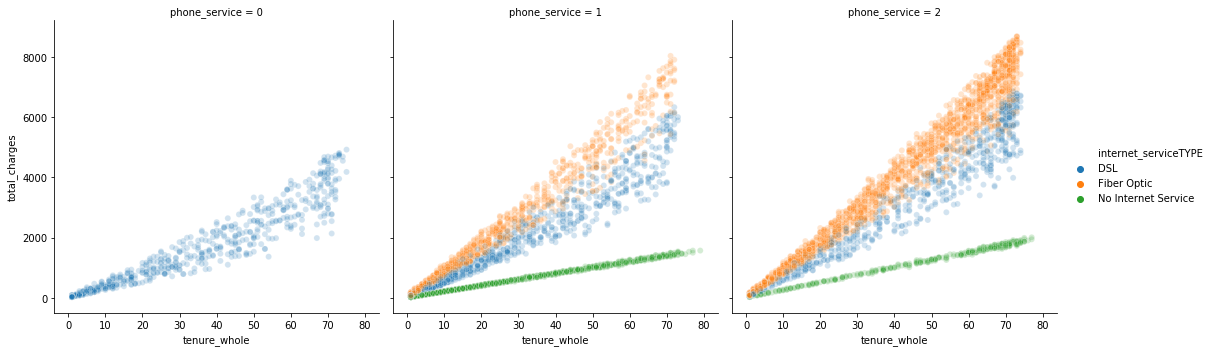

In [836]:
import seaborn as sns

sns.relplot(data = df, x="tenure_whole", y="total_charges", alpha=.2, hue="internet_serviceTYPE", col="phone_service")

In [460]:
df_dsl = df_no_null [df_no_null.internet_serviceTYPE == "DSL"]
stats.pearsonr(df_dsl.tenure_whole, df_dsl.total_charges)

(0.9421395850793447, 0.0)

In [463]:
df_fiber = df_no_null [df_no_null.internet_serviceTYPE == "Fiber Optic"]
stats.pearsonr(df_fiber.tenure_whole, df_fiber.total_charges)

(0.9859241683984012, 0.0)

In [834]:
df_no_internet = df_no_null [df_no_null.internet_serviceTYPE == "No Internet Service"]
stats.pearsonr(df_no_internet.tenure_whole, df_no_internet.total_charges)

(0.9843699680815097, 0.0)

In [471]:
df_one_line = df_no_null [df_no_null.phone_serviceTYPE == "One Line"]
stats.pearsonr(df_one_line.tenure_whole, df_one_line.total_charges)

(0.7727787601201376, 0.0)

In [472]:
df_two_line = df_no_null [df_no_null.phone_serviceTYPE == "Two or More Lines"]
stats.pearsonr(df_two_line.tenure_whole, df_two_line.total_charges)

(0.8415143440706854, 0.0)

In [584]:
df_no_phone = df_no_null [df_no_null.phone_serviceTYPE == "No Phone Service"]
stats.pearsonr(df_no_phone.tenure_whole, df_no_phone.total_charges)

(0.9546525421425739, 0.0)

> for all cases, the p-value is still zero, therefore, we reject the null hypothesis. they have strong cases for linear correlation. 

#### Use the employees database.


In [861]:
df_employees.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,from_date,to_date,dept_name,employment_len
0,d005,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,1986-06-26,9999-01-01,Development,12156
1,d007,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,1996-08-03,9999-01-01,Sales,12373
2,d004,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,1995-12-03,9999-01-01,Production,12093
3,d004,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,1986-12-01,9999-01-01,Production,11998
4,d003,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,1989-09-12,9999-01-01,Human Resources,10982


In [848]:
import env

url = env.get_url("employees")
query = """
    SELECT emp_no, DATEDIFF(now(),hire_date) AS tenure, salary
    FROM employees
    JOIN salaries as s USING (emp_no)
    JOIN dept_emp as de USING (emp_no)
    JOIN departments USING (dept_no)
    WHERE s.to_date = "9999-01-01" and de.to_date = "9999-01-01"
    """

df_1 = pd.read_sql(query,url)
df_1.head()

,emp_no,tenure,salary
0,10001,12157,88958
1,10002,12374,72527
2,10003,12094,43311
3,10004,11999,74057
4,10005,10983,94692


#### Is there a relationship between how long an employee has been with the company and their salary?


In [849]:
stats.pearsonr(df_1.tenure, df_1.salary)

(0.30646256131860783, 0.0)

> h0: there is no relationship between tenure and salary

> the p-value is zero, therefore, we reject the null hypothesis

#### Is there a relationship between how long an employee has been with the company and the number of titles they have had?


In [863]:
pd.read_sql("SHOW TABLES", url)

query2 = """
    SELECT * FROM titles
    JOIN employees USING (emp_no)
    """

df_employees2 = pd.read_sql(query2,url)
df_employees2.head()

,emp_no,title,from_date,to_date,birth_date,first_name,last_name,gender,hire_date
0,10001,Senior Engineer,1986-06-26,9999-01-01,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,Staff,1996-08-03,9999-01-01,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,Senior Engineer,1995-12-03,9999-01-01,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,Engineer,1986-12-01,1995-12-01,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,1954-05-01,Chirstian,Koblick,M,1986-12-01


In [864]:
df_employees2 = df_employees2.groupby("emp_no").count().title
df_employees2 = pd.DataFrame(df_employees2)
df4 = df_employees2.reset_index()
df4.rename(columns = {"title":"num_title"}, inplace=True)
df4.head()

,emp_no,num_title
0,10001,1
1,10002,1
2,10003,1
3,10004,2
4,10005,2


In [865]:
df_final = pd.merge(df4, df_employees, left_on='emp_no', right_on='emp_no', how='inner')
df_final.head()

,emp_no,num_title,dept_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,from_date,to_date,dept_name,employment_len
0,10001,1,d005,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,1986-06-26,9999-01-01,Development,12156
1,10002,1,d007,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,1996-08-03,9999-01-01,Sales,12373
2,10003,1,d004,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,1995-12-03,9999-01-01,Production,12093
3,10004,2,d004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,1986-12-01,9999-01-01,Production,11998
4,10005,2,d003,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,1989-09-12,9999-01-01,Human Resources,10982


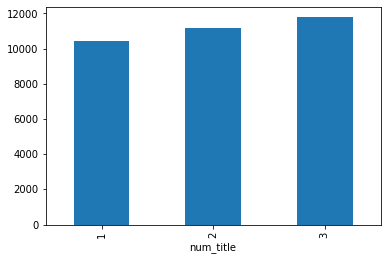

In [871]:
df_final.groupby("num_title").employment_len.mean().plot.bar()

In [404]:
stats.pearsonr(df_final.employment_len, df_final.num_title)

(0.2871267889699719, 0.0)

> h0: there is no linear relationship between tenure and number of titles

> the p-value is zero, therefore, we reject the null hypothesis

#### Use the sleepstudy data. Is there a relationship between days and reaction time?

In [574]:
sleepy = data("sleepstudy")
sleepy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [575]:
stats.pearsonr(sleepy.Days, sleepy.Reaction)

(0.5352302262650253, 9.894096322214812e-15)

> h0: there is no linear relationship between days and reaction time

> the p-value is close to zero, therefore, we reject the null hypothesis

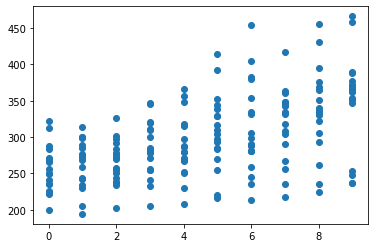

In [577]:
plt.scatter(sleepy.Days,sleepy.Reaction)

#### Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

    Codeup Student	Not Codeup Student
    Uses a Macbook, 49, 20
    Doesn't Use A Macbook, 1, 30


In [565]:
observed = pd.DataFrame([[49, 20], [1, 30]], index=["Uses Mac","Doesn't Use Mac"], columns=["Codeup","Not Codeup"])
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


> h0: using a macbook is independent of being a codeup student 

>we reject the null hypothesis

#### Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.



In [506]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,auto


> h0: the cylinder is independent of transmission type

>h1: the cylinder is not independent of transmission type

In [567]:
observed = pd.crosstab(mpg.cyl, mpg.transmission)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[41 40]
 [ 2  2]
 [56 23]
 [58 12]]
---
Expected

[[54.34615385 26.65384615]
 [ 2.68376068  1.31623932]
 [53.0042735  25.9957265 ]
 [46.96581197 23.03418803]]
---

chi^2 = 18.8823
p     = 0.0003


> we reject the null hypothesis

#### Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [600]:
query = """
    SELECT *
    FROM dept_emp
    JOIN employees USING (emp_no)
    JOIN departments USING (dept_no)
    WHERE to_date = "9999-01-01"
    """

df_d = pd.read_sql(query,url)
df_d.head()

,dept_no,emp_no,from_date,to_date,birth_date,first_name,last_name,gender,hire_date,dept_name
0,d009,10038,1989-09-20,9999-01-01,1960-07-20,Huan,Lortz,M,1989-09-20,Customer Service
1,d009,10049,1992-05-04,9999-01-01,1961-04-24,Basil,Tramer,F,1992-05-04,Customer Service
2,d009,10060,1992-11-11,9999-01-01,1961-10-15,Breannda,Billingsley,M,1987-11-02,Customer Service
3,d009,10088,1992-03-21,9999-01-01,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,Customer Service
4,d009,10112,1998-05-01,9999-01-01,1963-08-13,Yuichiro,Swick,F,1985-10-08,Customer Service


In [873]:
observed = pd.crosstab(df_d.gender, df_d.dept_name)
observed = observed[["Marketing","Sales"]]
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


> h0: current employees gender are independent of working in sales or marketing

> h1: current employees gender are dependent on working in sales or marketing

In [874]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed.values)
print('Expected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 5864 14999]
 [ 8978 22702]]
Expected

[[ 5893.2426013 14969.7573987]
 [ 8948.7573987 22731.2426013]]
---

chi^2 = 0.3240
p     = 0.5692


> we fail to reject the null hypothesis

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


#### Is an employee's gender independent of whether or not they are or have been a manager?

In [604]:
pd.read_sql("SHOW TABLES", url)

,Tables_in_employees
0,current_dept_emp
1,departments
2,dept_emp
3,dept_emp_latest_date
4,dept_manager
5,employees
6,employees_with_departments
7,salaries
8,titles


In [543]:
query = """
    SELECT *, "True" AS manager 
    FROM dept_manager
    """

df_m = pd.read_sql(query,url)
df_m.head()

,emp_no,dept_no,from_date,to_date,manager
0,110022,d001,1985-01-01,1991-10-01,True
1,110039,d001,1991-10-01,9999-01-01,True
2,110085,d002,1985-01-01,1989-12-17,True
3,110114,d002,1989-12-17,9999-01-01,True
4,110183,d003,1985-01-01,1992-03-21,True


In [605]:
query = """
    SELECT *
    FROM employees
    """

df_e = pd.read_sql(query,url)
df_e.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [558]:
df_managers = pd.merge(df_m, df_e, left_on='emp_no', right_on='emp_no', how='right')
df_managers = df_managers[["emp_no","manager","gender"]]
df_managers.manager = df_managers.manager == "True"
df_managers

,emp_no,manager,gender
0,110022,True,M
1,110039,True,M
2,110085,True,M
3,110114,True,F
4,110183,True,F
5,110228,True,F
6,110303,True,F
7,110344,True,F
8,110386,True,M
9,110420,True,M


> h0: gender and manager role are independent

> h1: gender and manager role are not independent

In [562]:
observed = pd.crosstab(df_managers.manager, df_managers.gender)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('Expected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[120038 179962]
 [    13     11]]
Expected

[[1.20041397e+05 1.79958603e+05]
 [9.60331174e+00 1.43966883e+01]]
---

chi^2 = 1.4567
p     = 0.2275


>we fail to reject the null hypothesis

#### Choose several continous and categorical variables that were not covered in the lesson and perform each type of test on them. You may use another data set if you wish.

In [612]:
kick = pd.read_csv("kickstarter.csv")
kick.shape

(45957, 17)

In [625]:
kick.rename(columns = {"project id":"project_id","funded percentage":"funded_percent","funded date":"funded_date","reward levels":"rewards_levels"}, inplace=True)
kick.head(2)

,project_id,name,url,category,subcategory,location,status,goal,pledged,funded_percent,backers,funded_date,levels,rewards_levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesabath/while-the-trees-sleep,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/education-enrichment-via-a-custom-online...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18


#### Is having 7 reward levels (the most popular amount) more successful than having 1 reward level?

> h0: the success rate of 7 reward levels is the same as the success rate of 1 reward level

In [705]:
kick_7_levels_funded = kick [kick.levels == 7].funded_percent
kick_1_levels_funded = kick [kick.levels == 1].funded_percent
stats.ttest_ind(kick_7_levels_funded, kick_1_levels_funded)

Ttest_indResult(statistic=-2.2679879152898654, pvalue=0.023360583128713964)

> we reject the null hypothesis

In [704]:
kick_7_levels_funded.mean(), kick_1_levels_funded.mean()

(0.788524412639645, 1.8418501868397774)

#### Is the most popular duration time, 30 days, more successful than all the durations?

>h0: a duration of 30 days has the same succuess as the population

In [689]:
kick_30_funded = kick [kick.duration == 30].funded_percent
kick_all_funded = kick.funded_percent.mean()
stats.ttest_1samp(kick_30_funded,kick_all_funded)

Ttest_1sampResult(statistic=-7.438772951666286, pvalue=1.0911621008328188e-13)

> we reject the null hypothesis

#### Does the number of levels a project have affect the number of backers?

> h0: the number of backers and number of levels have no linear correlation

In [709]:
stats.pearsonr(kick.backers,kick.levels)

(0.07786297236172753, 9.877561954450326e-63)

> we reject the null hypothesis

#### Does the number of backers affect how much of the project is funded?

> h0: the number of backers and percent funded have no linear correlation

In [628]:
stats.pearsonr(kick.backers,kick.funded_percent)

(0.005466117812079393, 0.2412852065457035)

> we fail to reject the null hypothesis

#### Is there a relationship between the goal amount and the percent funded

> h0: the goal amount and percent funded have no linear correlation

In [656]:
stats.pearsonr(kick.goal,kick.funded_percent)

(-0.0010216707315344876, 0.8266378807247481)

> we fail to reject the null hypothesis

#### Is there a relationship between the duration of the project and the percent funded? 

> h0: the duration and the percent funded have no linear correlation

In [659]:
stats.pearsonr(kick.duration,kick.funded_percent)

(-0.0031640688576789295, 0.4975921729293051)

> we fail to reject the null hypothesis

#### Does the category of the project determine whether a project will succeed or fail? 

> h0: the success or fail  of a project is indepedent of the category

In [651]:
observed = pd.crosstab(kick.category,kick.status)
observed = observed[["failed","successful"]]
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('Expected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1585 2106]
 [ 448  520]
 [ 180  527]
 [ 837  729]
 [ 684  335]
 [ 210  246]
 [5962 6177]
 [ 643  655]
 [ 832  635]
 [3261 6792]
 [ 742  645]
 [2484 1671]
 [ 448  289]
 [ 680 1642]]
Expected

[[1670.77888717 2020.22111283]
 [ 438.17771953  529.82228047]
 [ 320.03269391  386.96730609]
 [ 708.8701537   857.1298463 ]
 [ 461.26352913  557.73647087]
 [ 206.41429763  249.58570237]
 [5494.8753485  6644.1246515 ]
 [ 587.55648755  710.44351245]
 [ 664.05652329  802.94347671]
 [4550.62046944 5502.37953056]
 [ 627.84348862  759.15651138]
 [1880.81448826 2274.18551174]
 [ 333.61258191  403.38741809]
 [1051.08333135 1270.91666865]]
---

chi^2 = 1889.1346
p     = 0.0000


> we reject the null hypothesis

#### Import data from the game show Friend or Foe

In [887]:
ff = data('FriendFoe')
ff.shape

(227, 13)

In [888]:
ff = ff.rename(columns = {"round":"rnd"})
ff.head()

,sex,white,age,play,rnd,season,cash,sex1,white1,age1,play1,win,win1
1,male,yes,20,foe,1,1,1.2,male,yes,32,friend,1.2,0.0
2,male,yes,40,foe,3,1,7.7,female,yes,31,foe,0.0,0.0
3,female,no,35,foe,2,1,3.2,female,no,24,foe,0.0,0.0
4,male,yes,26,friend,1,1,1.2,male,yes,40,friend,0.6,0.6
5,female,yes,40,friend,3,1,5.7,male,yes,26,foe,0.0,5.7


#### On average, how much does the cash prize increase each round?

In [889]:
ff.groupby("rnd").mean().cash

rnd
1    1.050549
2    3.300000
3    6.172973
Name: cash, dtype: float64

#### What percentage of the time did the participants cooperate? 

In [890]:
pd.crosstab(ff.play,ff.play1)

play1,foe,friend
play,,
foe,72,43
friend,60,52


In [897]:
ff["cooperate"] = (ff.play == "friend") & (ff.play1 == "friend")
ff.head()

,sex,white,age,play,rnd,season,cash,sex1,white1,age1,play1,win,win1,cooperate
1,male,yes,20,foe,1,1,1.2,male,yes,32,friend,1.2,0.0,False
2,male,yes,40,foe,3,1,7.7,female,yes,31,foe,0.0,0.0,False
3,female,no,35,foe,2,1,3.2,female,no,24,foe,0.0,0.0,False
4,male,yes,26,friend,1,1,1.2,male,yes,40,friend,0.6,0.6,True
5,female,yes,40,friend,3,1,5.7,male,yes,26,foe,0.0,5.7,False


In [898]:
ff.cooperate.mean()

0.2290748898678414

#### Not cooperate?

In [899]:
1 - ff.cooperate.mean()

0.7709251101321586

#### Does the partner's age make a difference?

> h0: the age and play are indepedent

In [791]:
ff["cooperate"] = (ff.play == "friend") & (ff.play1 == "friend")
ff.head()

,sex,white,age,play,rnd,season,cash,sex1,white1,age1,play1,win,win1,cooperate
1,male,yes,20,foe,1,1,1.2,male,yes,32,friend,1.2,0.0,False
2,male,yes,40,foe,3,1,7.7,female,yes,31,foe,0.0,0.0,False
3,female,no,35,foe,2,1,3.2,female,no,24,foe,0.0,0.0,False
4,male,yes,26,friend,1,1,1.2,male,yes,40,friend,0.6,0.6,True
5,female,yes,40,friend,3,1,5.7,male,yes,26,foe,0.0,5.7,False


In [801]:
observed = pd.crosstab((ff.age),(ff.play))
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed)
print('Expected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

play  foe  friend
age              
18      4       4
19      3       1
20      8       2
21      3       3
22      9       5
23      7       8
24      7       8
25      6      10
26      4       5
27      8       3
28      5       5
29      8       6
30      3       7
31      8       4
32      7       5
33      3       3
34      3       5
35      2       1
36      1       3
37      2       2
39      3       2
40      2       4
41      0       4
42      1       4
43      3       1
44      1       2
46      0       1
47      1       1
48      1       0
49      1       0
51      0       2
55      1       0
57      0       1
Expected

[[4.05286344 3.94713656]
 [2.02643172 1.97356828]
 [5.0660793  4.9339207 ]
 [3.03964758 2.96035242]
 [7.09251101 6.90748899]
 [7.59911894 7.40088106]
 [7.59911894 7.40088106]
 [8.10572687 7.89427313]
 [4.55947137 4.44052863]
 [5.57268722 5.42731278]
 [5.0660793  4.9339207 ]
 [7.09251101 6.90748899]
 [5.0660793  4.9339207 ]
 [6.07929515 5.92070485]


> we fail to reject the null hypothesis

In [802]:
observed = pd.crosstab(ff.age1,ff.play1)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed)
print('Expected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

play1  foe  friend
age1              
18       1       0
19       9       4
20       7       6
21       4       4
22      16       2
23      10       7
24       5       6
25       4       5
26      11       5
27      10       5
28       7       2
29      10       6
30       6       3
31       7       4
32       4       2
33       1       4
34       2       1
35       1       3
36       3       2
37       3       3
38       0       3
39       1       1
40       3       5
41       1       3
42       0       1
43       1       1
44       1       1
46       0       1
48       0       1
49       2       1
50       1       2
61       0       1
65       1       0
Expected

[[ 0.5814978   0.4185022 ]
 [ 7.55947137  5.44052863]
 [ 7.55947137  5.44052863]
 [ 4.65198238  3.34801762]
 [10.46696035  7.53303965]
 [ 9.88546256  7.11453744]
 [ 6.39647577  4.60352423]
 [ 5.23348018  3.76651982]
 [ 9.30396476  6.69603524]
 [ 8.72246696  6.27753304]
 [ 5.23348018  3.76651982]
 [ 9.30396476  6.6

> we fail to reject the null hypothesis